# Task # 2 - To Explore
Supervised Machine Learning



In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.

In [1]:
import os
os.chdir("C:\\Users\\Ramya\\Desktop\\DataScienceTrack2020\\Grip")
data="http://bit.ly/w-data"

In [2]:
import pandas as pd
df=pd.read_csv(data)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [18]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Trendline and Regression line

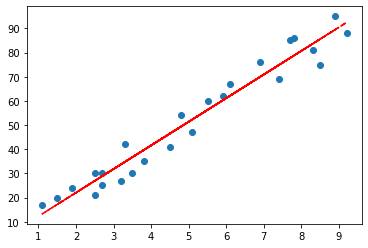

In [24]:

import matplotlib.pyplot as plt
import numpy as np

z = np.polyfit(df['Hours'], df['Scores'], 1)
p = np.poly1d(z)
plt.plot(df['Hours'],p(df['Hours']),"r--")


plt.scatter(df['Hours'],df['Scores'])

plt.show()

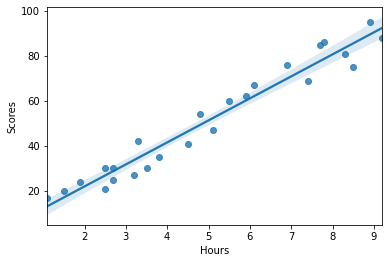

In [25]:
import seaborn as sns

sns.regplot(x='Hours', y='Scores', data=df)

# Model

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [6]:
model=ols("Scores~Hours",df).fit()

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           9.13e-17
Time:                        15:01:34   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

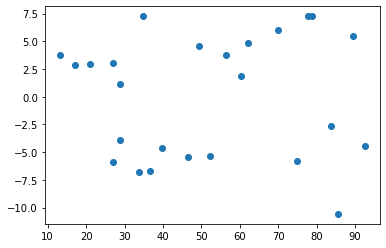

In [8]:
plt.scatter(model.predict(),model.resid)

In [16]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(df['Scores'],model.predict())

28.882730509245466

What will be predicted score if a student study for 9.25 hrs in a
day?

In [20]:
test=pd.DataFrame({"Hours":[9.25]})

In [21]:
model.predict(test)

0    92.909855
dtype: float64